-Instantáneo:
    - Impulsar en el perigeo y el apogeo "intantáneamente" (hecho).
    - Impulsar 2 veces el apogeo.
    - Evaluar deorbiting.
    
-Finito:
    - Mismo escenario, considerando un impulso finito:
            - evaluar la duración del combustible sólido (o propulsión iónica en el caso deorbiting).
            - Cambio de masa durante la propulsión.
            
*Cambio de masa entre un impulso y otro.
*agregar el resto de las perturbaciones.
*Agregar sección que detecte cuándo y con qué potencia impulsarse.

In [1]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [2]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import argrelextrema
import matplotlib as mpl
import matplotlib.pyplot as  plt
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

from models import atmosDensity
from maneuvers import Maneuvers
from coordinates import cart2kep

In [3]:
#Conwell's Method
# ----UNIVERSAL CONSTANTS----
# Universal Gravity
G = 6.67e-11
# Earth Mass
Me = 5.97e24
#Earth Radius
Re = 6378e3
#Earth Angular Speed
wE = np.array([0,0,7.2921159e-5])
#---------------------------
mu = G*Me
rp = Re+370e3
ra = Re+370e3
#rp = Re+350e3
#ra = Re+350e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
M = 332*np.pi/180
#-------------------
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
h = (mu*a*(1-e**2))**0.5
T = 2*np.pi/mu**0.5*a**(3/2)
Aceleration = 0.1
#--------------------
print("Starting propagations...")
maneuvers = Maneuvers([a,e,i,omega,Omega,M,0,mu])
maneuvers.addPerturbation("atmosphere")

maneuvers.propagate(60*60,350)
#maneuvers.propagate(60*60*24*86)
print("=============================================================================")
print("First propagation ended...")

maneuvers.impulsive_maneuver(Aceleration,1)
maneuvers.propagate(60*10,370)
maneuvers.impulsive_maneuver(0,1)
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
#maneuvers.propagate(60*60*(1.52/2))
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
print("=============================================================================")
print("Second propagation ended...")

maneuvers.propagate(60*60,350)
#maneuvers.propagate(60*60*24*90)
print("=============================================================================")
print("Last propagation ended.")

Starting propagations...
Day:0.0	Height: 370.0 km
Orbital Energy:-29504964.433906343
Day:1.4337917734699288e-07	Height: 370.0000006709956 km
Orbital Energy:-29504964.422265753
Day:1.4337917734699288e-07	Height: 369.9999993290044 km
Orbital Energy:-29504964.44573666
Day:2.8675835469398576e-07	Height: 370.0 km
Orbital Energy:-29504964.434096083
Day:2.8675835469398576e-07	Height: 369.99999865800885 km
Orbital Energy:-29504964.457566977
Day:2.4230635222452455e-05	Height: 369.9999986839378 km
Orbital Energy:-29504964.47294793
Day:2.4230635222452455e-05	Height: 369.99999863158166 km
Orbital Energy:-29504964.4738677
Day:4.817451209021092e-05	Height: 369.9999987617163 km
Orbital Energy:-29504964.487437636
Day:4.817451209021092e-05	Height: 369.9999986060457 km
Orbital Energy:-29504964.490160197
Day:7.211838895796939e-05	Height: 369.99999876159615 km
Orbital Energy:-29504964.50328038
Day:7.211838895796939e-05	Height: 369.9999986059265 km
Orbital Energy:-29504964.50600294
Day:0.000249511386741632

Day:3.0001599300972246	Height: 369.4095881444672 km
Orbital Energy:-29507559.481059033
Day:3.0	Height: 369.409479408673 km
Orbital Energy:-29507559.567870945
Day:3.000000176553792	Height: 369.40948053505366 km
Orbital Energy:-29507559.550188527
Day:3.000000176553792	Height: 369.40947849985025 km
Orbital Energy:-29507559.58578964
Day:3.0000003531075836	Height: 369.40947962622903 km
Orbital Energy:-29507559.56810723
Day:3.0000003531075836	Height: 369.4094775910266 km
Orbital Energy:-29507559.603708334
Day:3.0000217065164034	Height: 369.40949075697176 km
Orbital Energy:-29507559.6177035
Day:3.0000217065164034	Height: 369.4094907237571 km
Orbital Energy:-29507559.618287463
Day:3.0000430599252237	Height: 369.40950394262467 km
Orbital Energy:-29507559.63113852
Day:3.0000430599252237	Height: 369.40950384417175 km
Orbital Energy:-29507559.63285942
Day:3.0000644133340426	Height: 369.4095170658482 km
Orbital Energy:-29507559.645426787
Day:3.0000644133340426	Height: 369.4095169673944 km
Orbital E

Day:6.000035221342323	Height: 368.81436096614226 km
Orbital Energy:-29510149.007747397
Day:6.000035221342323	Height: 368.8143631548826 km
Orbital Energy:-29510148.98750751
Day:6.0	Height: 368.81431441053655 km
Orbital Energy:-29510148.96500405
Day:6.000000052298517	Height: 368.8143145721089 km
Orbital Energy:-29510148.96347697
Day:6.000000052298517	Height: 368.814314393498 km
Orbital Energy:-29510148.9666019
Day:6.0000001045970315	Height: 368.8143145550694 km
Orbital Energy:-29510148.965074837
Day:6.0000001045970315	Height: 368.8143143764585 km
Orbital Energy:-29510148.968199767
Day:6.000014333608352	Height: 368.8143340416718 km
Orbital Energy:-29510148.97777151
Day:6.000014333608352	Height: 368.81433403517866 km
Orbital Energy:-29510148.977885
Day:6.000028562619673	Height: 368.81435371361954 km
Orbital Energy:-29510148.987231165
Day:6.000028562619673	Height: 368.8143536942266 km
Orbital Energy:-29510148.987569604
Day:6.000042791630993	Height: 368.8143733760845 km
Orbital Energy:-29510

Day:8.000493716939365	Height: 368.42471820051225 km
Orbital Energy:-29511894.050897837
Day:8.000493716939365	Height: 368.4246810546815 km
Orbital Energy:-29511894.700565312
Day:8.0	Height: 368.4251963960212 km
Orbital Energy:-29511894.3285593
Day:8.000000225562408	Height: 368.4251978281215 km
Orbital Energy:-29511894.299641434
Day:8.000000225562408	Height: 368.4251945052501 km
Orbital Energy:-29511894.35778426
Day:8.000000451124816	Height: 368.4251959373448 km
Orbital Energy:-29511894.328866377
Day:8.000000451124816	Height: 368.42519261447245 km
Orbital Energy:-29511894.387009203
Day:8.000023616730141	Height: 368.4251690580761 km
Orbital Energy:-29511894.402366664
Day:8.000023616730141	Height: 368.4251690118322 km
Orbital Energy:-29511894.403183084
Day:8.000046782335465	Height: 368.42514549664503 km
Orbital Energy:-29511894.416951176
Day:8.000046782335465	Height: 368.4251453599669 km
Orbital Energy:-29511894.419345375
Day:8.00006994794079	Height: 368.4251218164237 km
Orbital Energy:-29

Day:11.00045773536852	Height: 367.805925401804 km
Orbital Energy:-29514585.60145738
Day:11.00045773536852	Height: 367.80589597395806 km
Orbital Energy:-29514586.118343115
Day:11.0	Height: 367.806621871327 km
Orbital Energy:-29514585.777053002
Day:11.00000033520147	Height: 367.80662501519174 km
Orbital Energy:-29514585.71305881
Day:11.00000033520147	Height: 367.8066176756034 km
Orbital Energy:-29514585.84150873
Day:11.00000067040294	Height: 367.80662081946156 km
Orbital Energy:-29514585.777514547
Day:11.00000067040294	Height: 367.8066134798741 km
Orbital Energy:-29514585.905964475
Day:11.000027106462921	Height: 367.80657201813256 km
Orbital Energy:-29514585.923459135
Day:11.000027106462921	Height: 367.8065719392924 km
Orbital Energy:-29514585.924855147
Day:11.0000535425229	Height: 367.80653059058824 km
Orbital Energy:-29514585.93965429
Day:11.0000535425229	Height: 367.8065303586107 km
Orbital Energy:-29514585.943720207
Day:11.00007997858288	Height: 367.806489004272 km
Orbital Energy:-29

Day:14.000232402845208	Height: 367.19855847842155 km
Orbital Energy:-29517283.503716137
Day:14.0	Height: 367.19866790461447 km
Orbital Energy:-29517284.409255937
Day:14.000000234767	Height: 367.19866954003646 km
Orbital Energy:-29517284.37790402
Day:14.000000234767	Height: 367.19866593912616 km
Orbital Energy:-29517284.440934766
Day:14.000000469534	Height: 367.1986675745407 km
Orbital Energy:-29517284.409582842
Day:14.000000469534	Height: 367.1986639736313 km
Orbital Energy:-29517284.472613577
Day:14.000023943667301	Height: 367.1986474545663 km
Orbital Energy:-29517284.488522314
Day:14.000023943667301	Height: 367.1986474057669 km
Orbital Energy:-29517284.489383884
Day:14.0000474178006	Height: 367.1986309026377 km
Orbital Energy:-29517284.503615707
Day:14.0000474178006	Height: 367.198630758442 km
Orbital Energy:-29517284.506141607
Day:14.0000708919339	Height: 367.1986141977794 km
Orbital Energy:-29517284.519959345
Day:14.0000708919339	Height: 367.1986140535837 km
Orbital Energy:-2951728

Day:17.000029732815044	Height: 366.59185406031924 km
Orbital Energy:-29519962.26904297
Day:17.000029732815044	Height: 366.59185130054783 km
Orbital Energy:-29519962.31731151
Day:17.0	Height: 366.5918598559257 km
Orbital Energy:-29519962.296318594
Day:17.000000188053516	Height: 366.5918609578302 km
Orbital Energy:-29519962.276222326
Day:17.000000188053516	Height: 366.5918586469414 km
Orbital Energy:-29519962.316679653
Day:17.00000037610703	Height: 366.5918597488385 km
Orbital Energy:-29519962.2965834
Day:17.00000037610703	Height: 366.5918574379487 km
Orbital Energy:-29519962.33704074
Day:17.000022174412592	Height: 366.5918512018556 km
Orbital Energy:-29519962.35206714
Day:17.000022174412592	Height: 366.5918511656448 km
Orbital Energy:-29519962.352705497
Day:17.00004397271815	Height: 366.59184490831194 km
Orbital Energy:-29519962.366484236
Day:17.00004397271815	Height: 366.5918448010795 km
Orbital Energy:-29519962.36836219
Day:17.000065771023706	Height: 366.59183846797885 km
Orbital Ener

Day:20.000165484070784	Height: 365.9901447686674 km
Orbital Energy:-29522602.46897456
Day:20.000165484070784	Height: 365.9901442340277 km
Orbital Energy:-29522602.47829125
Day:20.0	Height: 365.99025597024803 km
Orbital Energy:-29522602.360054534
Day:20.00000019235271	Height: 365.99025705284157 km
Orbital Energy:-29522602.339019768
Day:20.00000019235271	Height: 365.99025463465136 km
Orbital Energy:-29522602.381363194
Day:20.000000384705427	Height: 365.99025571723746 km
Orbital Energy:-29522602.36032844
Day:20.000000384705427	Height: 365.99025329904725 km
Orbital Energy:-29522602.402671866
Day:20.00002234596878	Height: 365.9902388223652 km
Orbital Energy:-29522602.417976286
Day:20.00002234596878	Height: 365.99023878501725 km
Orbital Energy:-29522602.41863529
Day:20.000044307232137	Height: 365.9902242807895 km
Orbital Energy:-29522602.43265285
Day:20.000044307232137	Height: 365.9902241702266 km
Orbital Energy:-29522602.434590306
Day:20.00006626849549	Height: 365.990209582258 km
Orbital En

Day:23.000132582189323	Height: 365.3506192335738 km
Orbital Energy:-29525387.58098665
Day:23.000132582189323	Height: 365.3506210740339 km
Orbital Energy:-29525387.552733254
Day:23.0	Height: 365.35073788183837 km
Orbital Energy:-29525387.4619982
Day:23.000000248542687	Height: 365.35073968430794 km
Orbital Energy:-29525387.42681616
Day:23.000000248542687	Height: 365.35073564619853 km
Orbital Energy:-29525387.497538425
Day:23.000000497085367	Height: 365.35073744865787 km
Orbital Energy:-29525387.462356374
Day:23.000000497085367	Height: 365.3507334105484 km
Orbital Energy:-29525387.53307864
Day:23.000024415223006	Height: 365.3507125411499 km
Orbital Energy:-29525387.54984281
Day:23.000024415223006	Height: 365.35071248843894 km
Orbital Energy:-29525387.55077442
Day:23.000048333360642	Height: 365.3506916215736 km
Orbital Energy:-29525387.56572757
Day:23.000048333360642	Height: 365.3506914659217 km
Orbital Energy:-29525387.568456106
Day:23.000072251498292	Height: 365.3506705222428 km
Orbital 

Day:26.00034227789364	Height: 364.7169063933184 km
Orbital Energy:-29528172.62653634
Day:26.00034227789364	Height: 364.7168936605258 km
Orbital Energy:-29528172.849366065
Day:26.0	Height: 364.7169739115965 km
Orbital Energy:-29528172.588741276
Day:26.000000352626827	Height: 364.71697790662574 km
Orbital Energy:-29528172.517792154
Day:26.000000352626827	Height: 364.7169697766649 km
Orbital Energy:-29528172.660204638
Day:26.000000705253644	Height: 364.71697377166896 km
Orbital Energy:-29528172.589255508
Day:26.000000705253644	Height: 364.71696564170907 km
Orbital Energy:-29528172.731668003
Day:26.000027577510888	Height: 364.71696027702933 km
Orbital Energy:-29528172.750508837
Day:26.000027577510888	Height: 364.7169601927381 km
Orbital Energy:-29528172.752000306
Day:26.000054449768125	Height: 364.7169548500553 km
Orbital Energy:-29528172.767959632
Day:26.000054449768125	Height: 364.7169546020804 km
Orbital Energy:-29528172.772304185
Day:26.000081322025366	Height: 364.71694915416464 km
Orb

Day:29.00007043534538	Height: 364.07212371345423 km
Orbital Energy:-29530982.34817507
Day:29.0	Height: 364.0719848155286 km
Orbital Energy:-29530985.466125593
Day:29.000000186497473	Height: 364.07198584212364 km
Orbital Energy:-29530985.44633819
Day:29.000000186497473	Height: 364.07198356761876 km
Orbital Energy:-29530985.48618831
Day:29.000000372994936	Height: 364.07198459420914 km
Orbital Energy:-29530985.46640089
Day:29.000000372994936	Height: 364.07198231970426 km
Orbital Energy:-29530985.50625101
Day:29.000022101182978	Height: 364.07196940298564 km
Orbital Energy:-29530985.521969825
Day:29.000022101182978	Height: 364.0719693671586 km
Orbital Energy:-29530985.522602197
Day:29.000043829371023	Height: 364.07195643947085 km
Orbital Energy:-29530985.537085503
Day:29.000043829371023	Height: 364.071956333383 km
Orbital Energy:-29530985.53894547
Day:29.000065557559065	Height: 364.0719433408128 km
Orbital Energy:-29530985.553123187
Day:29.000065557559065	Height: 364.071943234724 km
Orbital

Day:31.000351070596455	Height: 363.62237114055455 km
Orbital Energy:-29532837.550985865
Day:31.000351070596455	Height: 363.6222615828672 km
Orbital Energy:-29532839.467592955
Day:31.0	Height: 363.6227153441412 km
Orbital Energy:-29532839.090737443
Day:31.000000487961433	Height: 363.6227225021953 km
Orbital Energy:-29532838.95466066
Day:31.000000487961433	Height: 363.6227069292851 km
Orbital Energy:-29532839.22754041
Day:31.000000975922873	Height: 363.6227140873596 km
Orbital Energy:-29532839.091463603
Day:31.000000975922873	Height: 363.6226985144494 km
Orbital Energy:-29532839.36434335
Day:31.00003091681701	Height: 363.62266005728395 km
Orbital Energy:-29532839.385444798
Day:31.00003091681701	Height: 363.62265992652624 km
Orbital Energy:-29532839.38776783
Day:31.000060857711148	Height: 363.6226217984911 km
Orbital Energy:-29532839.404423498
Day:31.000060857711148	Height: 363.622621415738 km
Orbital Energy:-29532839.41113764
Day:31.000090798605285	Height: 363.6225834195204 km
Orbital En

Day:34.00047023050822	Height: 362.96771284535527 km
Orbital Energy:-29535693.320782665
Day:34.00047023050822	Height: 362.96763873146193 km
Orbital Energy:-29535694.62116459
Day:34.0	Height: 362.9681088433182 km
Orbital Energy:-29535694.203948304
Day:34.00000022128616	Height: 362.9681102197459 km
Orbital Energy:-29535694.176044602
Day:34.00000022128616	Height: 362.96810701648985 km
Orbital Energy:-29535694.232185274
Day:34.00000044257232	Height: 362.9681083929231 km
Orbital Energy:-29535694.204281576
Day:34.00000044257232	Height: 362.9681051896671 km
Orbital Energy:-29535694.260422237
Day:34.00002344210351	Height: 362.96808183479493 km
Orbital Energy:-29535694.277339756
Day:34.00002344210351	Height: 362.9680817896882 km
Orbital Energy:-29535694.278137296
Day:34.00004644163469	Height: 362.9680585812666 km
Orbital Energy:-29535694.293501623
Day:34.00004644163469	Height: 362.9680584479282 km
Orbital Energy:-29535694.295841113
Day:34.00006944116588	Height: 362.96803531810457 km
Orbital Ener

Day:37.00008120953668	Height: 362.30928503662534 km
Orbital Energy:-29538569.11247027
Day:37.00008120953668	Height: 362.3092850319622 km
Orbital Energy:-29538569.112560112
Day:37.0	Height: 362.3092980634402 km
Orbital Energy:-29538569.05065278
Day:37.000000080176996	Height: 362.30929826043734 km
Orbital Energy:-29538569.047027435
Day:37.000000080176996	Height: 362.30929783983805 km
Orbital Energy:-29538569.054400347
Day:37.00000016035399	Height: 362.309298036837 km
Orbital Energy:-29538569.050775014
Day:37.00000016035399	Height: 362.30929761623776 km
Orbital Energy:-29538569.058147926
Day:37.00001655421815	Height: 362.30929492037745 km
Orbital Energy:-29538569.070542514
Day:37.00001655421815	Height: 362.3092949088216 km
Orbital Energy:-29538569.07074589
Day:37.00003294808231	Height: 362.30929227204996 km
Orbital Energy:-29538569.08273902
Day:37.00003294808231	Height: 362.3092922376385 km
Orbital Energy:-29538569.083342377
Day:37.00004934194647	Height: 362.3092896425808 km
Orbital Energ

Day:40.00013267209081	Height: 361.65064683581704 km
Orbital Energy:-29541462.989323962
Day:40.00013267209081	Height: 361.65014462096616 km
Orbital Energy:-29541471.802360408
Day:40.0	Height: 361.65011761932914 km
Orbital Energy:-29541471.451152112
Day:40.000000247210714	Height: 361.65011969425717 km
Orbital Energy:-29541471.4162828
Day:40.000000247210714	Height: 361.65011569492424 km
Orbital Energy:-29541471.486403037
Day:40.000000494421435	Height: 361.6501177698597 km
Orbital Energy:-29541471.451533712
Day:40.000000494421435	Height: 361.65011377052684 km
Orbital Energy:-29541471.52165395
Day:40.00002435665847	Height: 361.65012109169925 km
Orbital Energy:-29541471.539606337
Day:40.00002435665847	Height: 361.6501210394157 km
Orbital Energy:-29541471.540529672
Day:40.00004821889551	Height: 361.65012852384615 km
Orbital Energy:-29541471.556684006
Day:40.00004821889551	Height: 361.6501283693761 km
Orbital Energy:-29541471.55939139
Day:40.00007208113255	Height: 361.6501359381648 km
Orbital 

Day:43.00035366130289	Height: 360.995499118302 km
Orbital Energy:-29544349.66144198
Day:43.0	Height: 360.9954296838278 km
Orbital Energy:-29544350.945032164
Day:43.0000000445983	Height: 360.9954297460718 km
Orbital Energy:-29544350.943925496
Day:43.0000000445983	Height: 360.99542961588224 km
Orbital Energy:-29544350.94620855
Day:43.0000000891966	Height: 360.99542967812624 km
Orbital Energy:-29544350.945101887
Day:43.0000000891966	Height: 360.9954295479385 km
Orbital Energy:-29544350.94738492
Day:43.000013565764085	Height: 360.9954286966901 km
Orbital Energy:-29544350.957872484
Day:43.000013565764085	Height: 360.99542869142164 km
Orbital Energy:-29544350.957965113
Day:43.00002704233156	Height: 360.99542786584794 km
Orbital Energy:-29544350.968269035
Day:43.00002704233156	Height: 360.99542785011977 km
Orbital Energy:-29544350.968544874
Day:43.00004051889905	Height: 360.99542704230174 km
Orbital Energy:-29544350.97880307
Day:43.00004051889905	Height: 360.9954270265745 km
Orbital Energy:-2

Day:45.0003846305517	Height: 360.5639030784303 km
Orbital Energy:-29546334.292471033
Day:45.0003846305517	Height: 360.5638410835648 km
Orbital Energy:-29546335.36930361
Day:45.0	Height: 360.5634426456019 km
Orbital Energy:-29546335.0192118
Day:45.000000158554656	Height: 360.56344363738316 km
Orbital Energy:-29546335.004904997
Day:45.000000158554656	Height: 360.56344199168217 km
Orbital Energy:-29546335.0337683
Day:45.00000031710931	Height: 360.5634429834615 km
Orbital Energy:-29546335.01946149
Day:45.00000031710931	Height: 360.5634413377596 km
Orbital Energy:-29546335.048324797
Day:45.00002088978115	Height: 360.56346324579886 km
Orbital Energy:-29546335.06426982
Day:45.00002088978115	Height: 360.56346321703774 km
Orbital Energy:-29546335.06477615
Day:45.00004146245299	Height: 360.56348513306307 km
Orbital Energy:-29546335.079726905
Day:45.00004146245299	Height: 360.56348504772035 km
Orbital Energy:-29546335.081221692
Day:45.00006203512482	Height: 360.56350692829864 km
Orbital Energy:-2

Day:48.00001071580373	Height: 359.8936327405814 km
Orbital Energy:-29549290.213358153
Day:48.00001071580373	Height: 359.89365299474446 km
Orbital Energy:-29549289.85792897
Day:48.0003053415468	Height: 359.89372148555054 km
Orbital Energy:-29549290.197535124
Day:48.0003053415468	Height: 359.89372006725335 km
Orbital Energy:-29549290.222240258
Day:48.0	Height: 359.8936431607632 km
Orbital Energy:-29549289.969928116
Day:48.00000015208491	Height: 359.89364396015833 km
Orbital Energy:-29549289.956766173
Day:48.00000015208491	Height: 359.89364244572073 km
Orbital Energy:-29549289.983332578
Day:48.00000030416981	Height: 359.8936432451112 km
Orbital Energy:-29549289.970170654
Day:48.00000030416981	Height: 359.8936417306736 km
Orbital Energy:-29549289.99673706
Day:48.00002059262646	Height: 359.8936473377142 km
Orbital Energy:-29549290.012672897
Day:48.00002059262646	Height: 359.89364731047397 km
Orbital Energy:-29549290.013153166
Day:48.00004088108313	Height: 359.89365290761555 km
Orbital Energ

Day:51.0000927466941	Height: 359.2052351518646 km
Orbital Energy:-29552300.3445289
Day:51.0	Height: 359.20513555927204 km
Orbital Energy:-29552302.553242594
Day:51.00000000991589	Height: 359.20513555927107 km
Orbital Energy:-29552302.553194117
Day:51.00000000991589	Height: 359.2051355528319 km
Orbital Energy:-29552302.55330709
Day:51.00000001983179	Height: 359.205135552831 km
Orbital Energy:-29552302.553258616
Day:51.00000001983179	Height: 359.20513554639274 km
Orbital Energy:-29552302.553371586
Day:51.00000817523926	Height: 359.2051328933313 km
Orbital Energy:-29552302.559956115
Day:51.00000817523926	Height: 359.2051328926254 km
Orbital Energy:-29552302.55996853
Day:51.00001633064673	Height: 359.2051302316878 km
Orbital Energy:-29552302.566528343
Day:51.00001633064673	Height: 359.2051302295737 km
Orbital Energy:-29552302.566565458
Day:51.0000244860542	Height: 359.205127559701 km
Orbital Energy:-29552302.573119115
Day:51.0000244860542	Height: 359.2051275575878 km
Orbital Energy:-295523

Day:53.000374857470156	Height: 358.7135823560208 km
Orbital Energy:-29554347.821203187
Day:53.000374857470156	Height: 358.71338790423704 km
Orbital Energy:-29554351.238171976
Day:53.000374857470156	Height: 358.7133877642583 km
Orbital Energy:-29554351.311999507
Day:53.00021774897372	Height: 358.7136470499486 km
Orbital Energy:-29554349.383044258
Day:53.0	Height: 358.7137965378398 km
Orbital Energy:-29554350.574363433
Day:53.000000004837005	Height: 358.7137965335902 km
Orbital Energy:-29554350.574353922
Day:53.000000004837005	Height: 358.71379653205724 km
Orbital Energy:-29554350.57438082
Day:53.000000009674004	Height: 358.71379652780666 km
Orbital Energy:-29554350.574371308
Day:53.000000009674004	Height: 358.7137965262746 km
Orbital Energy:-29554350.5743982
Day:53.00000643091604	Height: 358.71378986829706 km
Orbital Energy:-29554350.579628658
Day:53.00000643091604	Height: 358.7137898680251 km
Orbital Energy:-29554350.579633467
Day:53.00001285215805	Height: 358.71378321464545 km
Orbital

Day:54.00011088918782	Height: 358.5048632272044 km
Orbital Energy:-29555370.98819809
Day:54.00011088918782	Height: 358.504845959872 km
Orbital Energy:-29555371.290861316
Day:54.0	Height: 358.504959535908 km
Orbital Energy:-29555371.196770895
Day:54.00000046344243	Height: 358.5049660996981 km
Orbital Energy:-29555371.07370364
Day:54.00000046344243	Height: 358.50495203112627 km
Orbital Energy:-29555371.320597593
Day:54.000000926884866	Height: 358.5049585948866 km
Orbital Energy:-29555371.197530344
Day:54.000000926884866	Height: 358.5049445263166 km
Orbital Energy:-29555371.44442428
Day:54.00003033548034	Height: 358.5049146692874 km
Orbital Energy:-29555371.46742226
Day:54.00003033548034	Height: 358.50491454724965 km
Orbital Energy:-29555371.469592094
Day:54.00005974407582	Height: 358.5048848160729 km
Orbital Energy:-29555371.488430522
Day:54.00005974407582	Height: 358.5048844585288 km
Orbital Energy:-29555371.494710617
Day:54.000089152671286	Height: 358.50485466901677 km
Orbital Energy:-

Day:57.00028009547719	Height: 357.7938217448574 km
Orbital Energy:-29558456.333030157
Day:57.00028009547719	Height: 357.79381568510456 km
Orbital Energy:-29558456.4535472
Day:57.0	Height: 357.7941831594063 km
Orbital Energy:-29558456.21581135
Day:57.000000034449194	Height: 357.7941831534002 km
Orbital Energy:-29558456.215157557
Day:57.000000034449194	Height: 357.7941830756478 km
Orbital Energy:-29558456.216522336
Day:57.00000006889837	Height: 357.7941830696408 km
Orbital Energy:-29558456.21586856
Day:57.00000006889837	Height: 357.79418299188933 km
Orbital Energy:-29558456.217233334
Day:57.00001242861811	Height: 357.7941668862598 km
Orbital Energy:-29558456.22746354
Day:57.00001242861811	Height: 357.79416688251587 km
Orbital Energy:-29558456.227529664
Day:57.000024788337846	Height: 357.7941507754503 km
Orbital Energy:-29558456.23762903
Day:57.000024788337846	Height: 357.79415076427347 km
Orbital Energy:-29558456.23782573
Day:57.00003714805758	Height: 357.7941346501736 km
Orbital Energy:

Day:60.0001903270221	Height: 357.0776141552264 km
Orbital Energy:-29561555.02247674
Day:60.0001903270221	Height: 357.07761597614547 km
Orbital Energy:-29561554.991087094
Day:60.0	Height: 357.0778944184454 km
Orbital Energy:-29561554.830859553
Day:60.000000063493225	Height: 357.0778944573952 km
Orbital Energy:-29561554.828593887
Day:60.000000063493225	Height: 357.07789419321625 km
Orbital Energy:-29561554.833232023
Day:60.000000126986464	Height: 357.077894232166 km
Orbital Energy:-29561554.830966346
Day:60.000000126986464	Height: 357.07789396798796 km
Orbital Energy:-29561554.835604466
Day:60.000015281794624	Height: 357.07787174620944 km
Orbital Energy:-29561554.84827205
Day:60.000015281794624	Height: 357.0778717377242 km
Orbital Energy:-29561554.848422028
Day:60.0000304366028	Height: 357.0778495423691 km
Orbital Energy:-29561554.860793866
Day:60.0000304366028	Height: 357.0778495170977 km
Orbital Energy:-29561554.861238632
Day:60.00004559141096	Height: 357.0778273354676 km
Orbital Energ

Day:63.00047421485899	Height: 356.3560457276497 km
Orbital Energy:-29564688.498826176
Day:63.00047421485899	Height: 356.3559127192069 km
Orbital Energy:-29564690.832439017
Day:63.0	Height: 356.3565156891877 km
Orbital Energy:-29564690.327426977
Day:63.00000021966392	Height: 356.3565169880381 km
Orbital Energy:-29564690.299844943
Day:63.00000021966392	Height: 356.35651382537463 km
Orbital Energy:-29564690.35538308
Day:63.000000439327835	Height: 356.3565151242316 km
Orbital Energy:-29564690.327801026
Day:63.000000439327835	Height: 356.3565119615691 km
Orbital Energy:-29564690.383339148
Day:63.000023359992674	Height: 356.35648253810035 km
Orbital Energy:-29564690.402455553
Day:63.000023359992674	Height: 356.3564824933773 km
Orbital Energy:-29564690.403248202
Day:63.00004628065751	Height: 356.35645321667846 km
Orbital Energy:-29564690.42082141
Day:63.00004628065751	Height: 356.35645308448187 km
Orbital Energy:-29564690.423146114
Day:63.00006920132236	Height: 356.3564238873161 km
Orbital En

Day:66.00030996806922	Height: 355.6302973457901 km
Orbital Energy:-29567841.695982084
Day:66.0	Height: 355.63036404034773 km
Orbital Energy:-29567843.93475853
Day:66.00000026360358	Height: 355.6303661349481 km
Orbital Energy:-29567843.8949793
Day:66.00000026360358	Height: 355.63036157949267 km
Orbital Energy:-29567843.974992935
Day:66.00000052720715	Height: 355.630363674107 km
Orbital Energy:-29567843.935213692
Day:66.00000052720715	Height: 355.6303591186525 km
Orbital Energy:-29567844.015227318
Day:66.00002488200789	Height: 355.63034228463005 km
Orbital Energy:-29567844.035743285
Day:66.00002488200789	Height: 355.63034222753066 km
Orbital Energy:-29567844.036755394
Day:66.00004923680862	Height: 355.6303256177306 km
Orbital Energy:-29567844.055305593
Day:66.00004923680862	Height: 355.6303254492143 km
Orbital Energy:-29567844.05826754
Day:66.00007359160935	Height: 355.63030897762906 km
Orbital Energy:-29567844.076332774
Day:66.00007359160935	Height: 355.6303088091109 km
Orbital Energy:-

Day:69.00017391344285	Height: 354.89674930120725 km
Orbital Energy:-29571031.824915573
Day:69.0	Height: 354.896507670722 km
Orbital Energy:-29571034.16218535
Day:69.00000043947927	Height: 354.8965142510785 km
Orbital Energy:-29571034.051321022
Day:69.00000043947927	Height: 354.89650158621276 km
Orbital Energy:-29571034.273819834
Day:69.00000087895853	Height: 354.8965081666205 km
Orbital Energy:-29571034.162955496
Day:69.00000087895853	Height: 354.89649550175574 km
Orbital Energy:-29571034.385454316
Day:69.00002975606525	Height: 354.8965119605474 km
Orbital Energy:-29571034.409738127
Day:69.00002975606525	Height: 354.8965118470639 km
Orbital Energy:-29571034.411753096
Day:69.00005863317196	Height: 354.8965287460983 km
Orbital Energy:-29571034.43216177
Day:69.00005863317196	Height: 354.8965284131849 km
Orbital Energy:-29571034.438007426
Day:69.00008751027868	Height: 354.89654558075966 km
Orbital Energy:-29571034.457463257
Day:69.00008751027868	Height: 354.8965452478453 km
Orbital Energy:

Day:72.00005742894011	Height: 354.1645169886928 km
Orbital Energy:-29574317.366834324
Day:72.00005742894011	Height: 354.1644251953056 km
Orbital Energy:-29574318.951933295
Day:72.0	Height: 354.1642787645245 km
Orbital Energy:-29574318.894543957
Day:72.00000035451207	Height: 354.1642837921046 km
Orbital Energy:-29574318.822436646
Day:72.00000035451207	Height: 354.16427554919943 km
Orbital Energy:-29574318.96728093
Day:72.00000070902414	Height: 354.1642805767916 km
Orbital Energy:-29574318.895173635
Day:72.00000070902414	Height: 354.16427233388646 km
Orbital Energy:-29574319.040017933
Day:72.00002758698739	Height: 354.1643411152456 km
Orbital Energy:-29574319.06313298
Day:72.00002758698739	Height: 354.1643410304729 km
Orbital Energy:-29574319.064631928
Day:72.00005446495065	Height: 354.1644100570241 km
Orbital Energy:-29574319.084841307
Day:72.00005446495065	Height: 354.1644098074092 km
Orbital Energy:-29574319.089216825
Day:72.00008134291392	Height: 354.16447895052937 km
Orbital Energy:

Day:75.00019244820298	Height: 353.4391615185952 km
Orbital Energy:-29577609.82680074
Day:75.00019244820298	Height: 353.43915747871904 km
Orbital Energy:-29577609.89867661
Day:75.0	Height: 353.4386250882875 km
Orbital Energy:-29577609.72299992
Day:75.00000040059194	Height: 353.43863146515747 km
Orbital Energy:-29577609.63084757
Day:75.00000040059194	Height: 353.43862093787453 km
Orbital Energy:-29577609.815872513
Day:75.00000080118389	Height: 353.43862731472404 km
Orbital Energy:-29577609.72372018
Day:75.00000080118389	Height: 353.43861678744105 km
Orbital Energy:-29577609.908745117
Day:75.00002879367084	Height: 353.4386945769023 km
Orbital Energy:-29577609.933018286
Day:75.00002879367084	Height: 353.438694476963 km
Orbital Energy:-29577609.934786998
Day:75.00005678615778	Height: 353.4387723694816 km
Orbital Energy:-29577609.95564117
Day:75.00005678615778	Height: 353.43877207568477 km
Orbital Energy:-29577609.960791748
Day:75.00008477864473	Height: 353.4388499195175 km
Orbital Energy:-2

Day:78.00010689509645	Height: 352.6900447025597 km
Orbital Energy:-29580960.60186857
Day:78.00010689509645	Height: 352.69000217525286 km
Orbital Energy:-29580961.348990258
Day:78.0	Height: 352.68994361227846 km
Orbital Energy:-29580961.24656907
Day:78.00000018952588	Height: 352.6899448976852 km
Orbital Energy:-29580961.226024956
Day:78.00000018952588	Height: 352.6899425407611 km
Orbital Energy:-29580961.26745884
Day:78.00000037905176	Height: 352.68994382615944 km
Orbital Energy:-29580961.24691472
Day:78.00000037905176	Height: 352.68994146923535 km
Orbital Energy:-29580961.288348604
Day:78.00002218740849	Height: 352.68995373063626 km
Orbital Energy:-29580961.30790985
Day:78.00002218740849	Height: 352.6899536940223 km
Orbital Energy:-29580961.30855703
Day:78.00004399576522	Height: 352.68996590609385 km
Orbital Energy:-29580961.326851863
Day:78.00004399576522	Height: 352.68996579763575 km
Orbital Energy:-29580961.328757226
Day:78.00006580412195	Height: 352.68997790512816 km
Orbital Energy

Day:81.00033473769085	Height: 351.91225830871707 km
Orbital Energy:-29584328.275901865
Day:81.0	Height: 351.9131771392804 km
Orbital Energy:-29584330.507862113
Day:81.0000001055494	Height: 351.91317717324847 km
Orbital Energy:-29584330.50153151
Day:81.0000001055494	Height: 351.9131764420746 km
Orbital Energy:-29584330.514388267
Day:81.00000021109882	Height: 351.91317647604365 km
Orbital Energy:-29584330.508057635
Day:81.00000021109882	Height: 351.91317574486976 km
Orbital Energy:-29584330.52091439
Day:81.00001815021986	Height: 351.91311936593985 km
Orbital Energy:-29584330.537380833
Day:81.00001815021986	Height: 351.913119349136 km
Orbital Energy:-29584330.537679557
Day:81.0000360893409	Height: 351.91306295327655 km
Orbital Energy:-29584330.553561103
Day:81.0000360893409	Height: 351.91306290339026 km
Orbital Energy:-29584330.554442152
Day:81.00005402846195	Height: 351.91300646553003 km
Orbital Energy:-29584330.570179306
Day:81.00005402846195	Height: 351.9130064156428 km
Orbital Energy:

Day:84.00055951241107	Height: 351.1065114232032 km
Orbital Energy:-29587746.383738827
Day:84.00055951241107	Height: 351.10619415197056 km
Orbital Energy:-29587751.92054839
Day:84.0	Height: 351.108140056598 km
Orbital Energy:-29587751.145575114
Day:84.0000002214472	Height: 351.1081408944959 km
Orbital Energy:-29587751.117473204
Day:84.0000002214472	Height: 351.1081376752593 km
Orbital Energy:-29587751.17409302
Day:84.00000044289438	Height: 351.1081385131627 km
Orbital Energy:-29587751.145991117
Day:84.00000044289438	Height: 351.10813529392703 km
Orbital Energy:-29587751.202610917
Day:84.00002340936497	Height: 351.1080553095471 km
Orbital Energy:-29587751.223774176
Day:84.00002340936497	Height: 351.1080552641554 km
Orbital Energy:-29587751.224582825
Day:84.00004637583558	Height: 351.10797542621566 km
Orbital Energy:-29587751.244176913
Day:84.00004637583558	Height: 351.10797529217973 km
Orbital Energy:-29587751.24654331
Day:84.00006934230619	Height: 351.1078955327552 km
Orbital Energy:-29

Day:86.0003961120021	Height: 350.6128858152386 km
Orbital Energy:-29589979.51473274
Day:86.0003961120021	Height: 350.61274771728364 km
Orbital Energy:-29589981.936016865
Day:86.0	Height: 350.61140459579605 km
Orbital Energy:-29589981.231888935
Day:86.00000023928031	Height: 350.6114072981635 km
Orbital Energy:-29589981.19905309
Day:86.00000023928031	Height: 350.61140353900475 km
Orbital Energy:-29589981.26517874
Day:86.0000004785606	Height: 350.6114062413732 km
Orbital Energy:-29589981.232342888
Day:86.0000004785606	Height: 350.6114024822144 km
Orbital Energy:-29589981.298468545
Day:86.00002404229294	Height: 350.6114835342197 km
Orbital Energy:-29589981.3203788
Day:86.00002404229294	Height: 350.611483484312 km
Orbital Energy:-29589981.32125848
Day:86.00004760602529	Height: 350.6115646377793 km
Orbital Energy:-29589981.34144682
Day:86.00004760602529	Height: 350.61156449008917 km
Orbital Energy:-29589981.344035067
Day:86.00007116975762	Height: 350.61164566920326 km
Orbital Energy:-2958998

First propagation ended...
Second propagation ended...
Day:89.00050076052315	Height: 369.5273638013294 km
Orbital Energy:-29504924.755052745
Day:89.00050076052315	Height: 369.52737396960424 km
Orbital Energy:-29504924.74397622
Day:89.00107291965578	Height: 369.58775690087026 km
Orbital Energy:-29504923.145127837
Day:89.00107291965578	Height: 369.5876347764926 km
Orbital Energy:-29504925.180051588
Day:90.00022700612806	Height: 369.24018561326807 km
Orbital Energy:-29505780.30528168
Day:90.00022700612806	Height: 369.2401858951794 km
Orbital Energy:-29505780.300206758
Day:90.0004834340307	Height: 369.2146528724432 km
Orbital Energy:-29505780.471691277
Day:90.0004834340307	Height: 369.2146527551171 km
Orbital Energy:-29505780.47369049
Day:90.00073986193337	Height: 369.1895021233624 km
Orbital Energy:-29505780.61771378
Day:90.00073986193337	Height: 369.18950040301866 km
Orbital Energy:-29505780.64807382
Day:90.00099628983604	Height: 369.1647457511686 km
Orbital Energy:-29505780.807113133
Da

Day:96.00016577993716	Height: 368.474551224499 km
Orbital Energy:-29510949.53592437
Day:96.00016577993716	Height: 368.4745536675211 km
Orbital Energy:-29510949.492244057
Day:96.00085157983864	Height: 368.3974436247442 km
Orbital Energy:-29510950.81296629
Day:96.00085157983864	Height: 368.39750723373237 km
Orbital Energy:-29510949.68403624
Day:96.00070833005032	Height: 368.4134919278491 km
Orbital Energy:-29510950.2204911
Day:96.00070833005032	Height: 368.4135172781553 km
Orbital Energy:-29510949.769740563
Day:97.00049390143066	Height: 369.50830191534385 km
Orbital Energy:-29511767.849366974
Day:97.00049390143066	Height: 369.5079347882485 km
Orbital Energy:-29511773.965634175
Day:98.00006709563642	Height: 367.2641431017453 km
Orbital Energy:-29512649.572072838
Day:98.00044217838025	Height: 367.2872821564553 km
Orbital Energy:-29512649.935780462
Day:98.00044217838025	Height: 367.2873352249945 km
Orbital Energy:-29512649.471333217
Day:98.00044217838025	Height: 367.28728290326524 km
Orbita

Day:106.00019064153047	Height: 367.501066460019 km
Orbital Energy:-29519774.93543475
Day:106.00019064153047	Height: 367.5010019223876 km
Orbital Energy:-29519775.50022184
Day:106.00019064153047	Height: 367.50108991639314 km
Orbital Energy:-29519774.730161376
Day:106.00019064153047	Height: 367.5010789818121 km
Orbital Energy:-29519774.82585299
Day:106.00019064153047	Height: 367.501066460019 km
Orbital Energy:-29519775.16400667
Day:106.00019064153047	Height: 367.501066460019 km
Orbital Energy:-29519774.987046063
Day:106.00019064153047	Height: 367.501066460019 km
Orbital Energy:-29519775.53477808
Day:106.00019064153047	Height: 367.50102010471375 km
Orbital Energy:-29519775.74592587
Day:106.00073820862217	Height: 367.53803760015313 km
Orbital Energy:-29519774.454620983
Day:106.00073820862217	Height: 367.5379177318271 km
Orbital Energy:-29519776.54493871
Day:107.0001322458585	Height: 365.3432140108086 km
Orbital Energy:-29520687.36983262
Day:107.0001322458585	Height: 365.34320714012534 km
O

Day:114.00006917708271	Height: 365.0169455734072 km
Orbital Energy:-29527108.936945073
Day:114.00006917708271	Height: 365.01694566288313 km
Orbital Energy:-29527108.93532559
Day:114.00073593982417	Height: 364.94288721059917 km
Orbital Energy:-29527109.670162827
Day:114.00073593982417	Height: 364.9429073772924 km
Orbital Energy:-29527109.310343906
Day:114.00052155684817	Height: 364.96672287375947 km
Orbital Energy:-29527109.316318363
Day:114.00052155684817	Height: 364.9667269222466 km
Orbital Energy:-29527109.24378195
Day:114.00097393661365	Height: 364.91645104550383 km
Orbital Energy:-29527109.589981727
Day:114.00097393661365	Height: 364.9164501907099 km
Orbital Energy:-29527109.60280538
Day:115.00049095796537	Height: 365.70037027807535 km
Orbital Energy:-29528035.25799205
Day:115.00105386743866	Height: 365.7294643096216 km
Orbital Energy:-29528035.914174527
Day:116.00016606919809	Height: 363.5533947764337 km
Orbital Energy:-29528965.102030646
Day:116.00016606919809	Height: 363.5533866

Day:129.00019397516877	Height: 360.80816410305073 km
Orbital Energy:-29541363.579889536
Day:129.00075364701294	Height: 360.77302539988887 km
Orbital Energy:-29541364.39693353
Day:130.0000849935316	Height: 362.4212961418973 km
Orbital Energy:-29542357.43972896
Day:130.0004723745668	Height: 362.4007191611174 km
Orbital Energy:-29542357.850450553
Day:130.00085975560202	Height: 362.37877896940057 km
Orbital Energy:-29542358.08176686
Day:131.0001874559672	Height: 361.3395227065431 km
Orbital Energy:-29543290.93115609
Day:131.0001874559672	Height: 361.3390328908451 km
Orbital Energy:-29543299.528301686
Day:131.00045729187877	Height: 361.36821144464795 km
Orbital Energy:-29543295.645552874
Day:131.00045729187877	Height: 361.36797728927434 km
Orbital Energy:-29543299.73758521
Day:131.00072712779036	Height: 361.3968304564031 km
Orbital Energy:-29543299.98827483
Day:131.00072712779036	Height: 361.3968333365675 km
Orbital Energy:-29543299.949788667
Day:131.00099696370197	Height: 361.4255793680064

Day:141.00006023872805	Height: 358.2901711110361 km
Orbital Energy:-29553381.20883141
Day:141.00006023872805	Height: 358.29015986444523 km
Orbital Energy:-29553381.41815652
Day:141.00075295444466	Height: 358.35024763515406 km
Orbital Energy:-29553374.62021398
Day:141.00075295444466	Height: 358.34978171430527 km
Orbital Energy:-29553382.794316046
Day:141.00063496871283	Height: 358.33969457476775 km
Orbital Energy:-29553377.79439283
Day:141.00063496871283	Height: 358.3394411953427 km
Orbital Energy:-29553382.23898639
Day:142.0000783872541	Height: 358.14107782985457 km
Orbital Energy:-29554391.9767107
Day:142.0000783872541	Height: 358.1410788266901 km
Orbital Energy:-29554391.95885076
Day:142.00031504581725	Height: 358.11990394409 km
Orbital Energy:-29554392.171027623
Day:142.00031504581725	Height: 358.1199049465172 km
Orbital Energy:-29554392.153069012
Day:142.0005517043804	Height: 358.0990537795564 km
Orbital Energy:-29554392.365340013
Day:142.0005517043804	Height: 358.09905478281155 km

Day:160.000697726117	Height: 355.4419788803663 km
Orbital Energy:-29573187.206579074
Day:160.000697726117	Height: 355.44148732373395 km
Orbital Energy:-29573195.664731804
Day:161.00044874904958	Height: 353.65938112797494 km
Orbital Energy:-29574292.676060673
Day:161.00044874904958	Height: 353.65939658764654 km
Orbital Energy:-29574292.540211763
Day:161.00044874904958	Height: 353.6593906138381 km
Orbital Energy:-29574292.592705462
Day:161.00044874904958	Height: 353.65945649198164 km
Orbital Energy:-29574292.013813864
Day:161.00044874904958	Height: 353.65938112797494 km
Orbital Energy:-29574293.335129436
Day:161.00044874904958	Height: 353.65938112797494 km
Orbital Energy:-29574292.50191554
Day:161.00044874904958	Height: 353.65938112797494 km
Orbital Energy:-29574292.627755284
Day:161.00044874904958	Height: 353.65921502402426 km
Orbital Energy:-29574295.678649902
Day:161.00101964787794	Height: 353.71084600502627 km
Orbital Energy:-29574293.530935235
Day:161.00101964787794	Height: 353.7106

Last propagation ended.


In [4]:
#Cleanup
validPoints = np.all(abs(maneuvers.rTrace) > 1e-10,axis=1)
rTrace = maneuvers.rTrace[validPoints]
vTrace = maneuvers.vTrace[validPoints]
tTrace = maneuvers.tTrace[validPoints]

#Get Perigees and Apogees
perigees = []
apogees = []
for i in range(0,len(tTrace)):
    a,e = cart2kep(rTrace[i,:],vTrace[i,:])
    rp = (1-e)*a
    ra = (1+e)*a
    perigees.append(rp)
    apogees.append(ra)
perigees = np.asarray(perigees)
apogees = np.asarray(apogees)

<IPython.core.display.Javascript object>


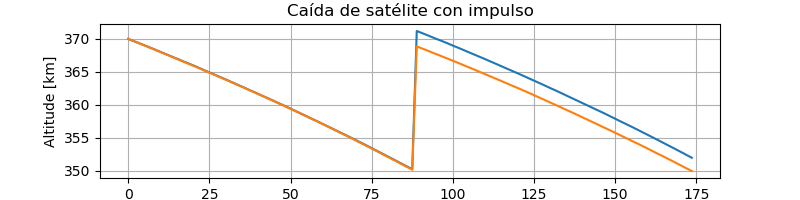

In [11]:
#PLOTTING
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

p1 = plt.figure(figsize=(8,2))
plt.plot(tTrace[:-2:1000]/60/60/24,(apogees[:-2:1000]-Re)/1e3);
plt.plot(tTrace[:-2:1000]/60/60/24,(perigees[:-2:1000]-Re)/1e3);
plt.grid();
plt.title("Caída de satélite con impulso")
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")
mplcursors.cursor(hover=True);

In [6]:
a = (350e3+Re+370e3+Re)/2
T = 2*np.pi*(a**3/mu)**0.5
print(T/60/60)
A = np.array([1, 2, 3])
B = np.array([3, 2, 1])
C = A*B
print(C)

1.5297617407237356
[3 4 3]


In [7]:
Z = np.array([])
X3 = np.array([])
Y3 = np.array([])
Z3 = np.array([])

#THIS ITERATION HAVE TO BE OPTIMISED
for i in range(len(maneuvers.rTrace)):
    X3 = np.append(X3,maneuvers.rTrace[i][0])
    Y3 = np.append(Y3,maneuvers.rTrace[i][1])
    Z3 = np.append(Z3,maneuvers.rTrace[i][2])
    Z = np.append(Z,np.linalg.norm(maneuvers.rTrace[i])-Re)

<IPython.core.display.Javascript object>


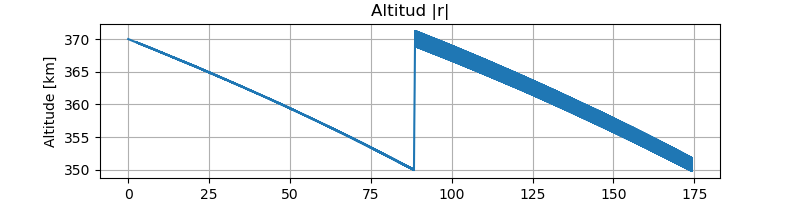

Text(0,0.5,'Altitude [km]')

In [10]:
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

p2 = plt.figure(figsize=(8,2))
plt.plot(maneuvers.tTrace/60/60/24,(Z/1e3));
plt.grid();
plt.title("Altitud |r|")
plt.xlabel("time [days]")
plt.ylabel("Altitude [km]")

<IPython.core.display.Javascript object>


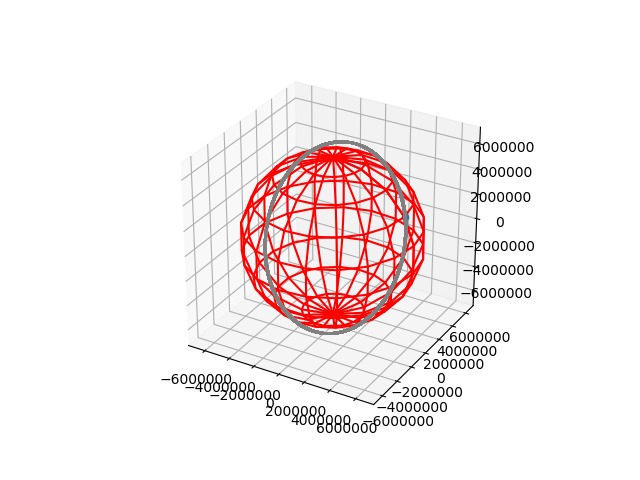

In [9]:
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'
#plt.figure(figsize=(8,2))
ax = plt.axes(projection='3d')
ax.set_aspect("equal")

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = Re*np.cos(u)*np.sin(v)
y = Re*np.sin(u)*np.sin(v)
z = Re*np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
ax.plot3D(X3, Y3, Z3, 'gray')
ax.scatter(maneuvers.current_r[0], maneuvers.current_r[1], maneuvers.current_r[2])
#plt.grid();